Example code for edge-wise network comparison for two task conditions
=======================================================================

In [73]:
%matplotlib inline

import pandas as pd
import numpy as np
from nilearn.connectome import sym_matrix_to_vec, vec_to_sym_matrix
from nilearn.plotting import plot_matrix
import matplotlib.pyplot as plt

from scipy import stats

dualnback = np.load("/home/finc/Dropbox/Projects/LearningBrain/data/neuroimaging/correlation_matrices_dualnback.npy")


(46, 2, 264, 264)

In [74]:
rest = sym_matrix_to_vec(dualnback[:,0,:,:], discard_diagonal = True)
one_back = sym_matrix_to_vec(dualnback[:,1,:,:], discard_diagonal = True)
two_back = sym_matrix_to_vec(dualnback[:,2,:,:], discard_diagonal = True)

rest.shape

(46, 34716)

In [75]:
stat, pvalues = stats.ttest_rel(one_back, two_back)

In [61]:
stat

array([ 0.5721722 , -1.09102945, -0.18147191, ..., -2.83914481,
        1.58645077, -1.77733148])

In [76]:
import statsmodels.stats.multitest as ssm

_, pvals_corrected, _, _ = ssm.multipletests(pvalues, alpha = 0.05, method = 'fdr_bh')


In [77]:
pvals_corrected_thr = np.zeros((len(pvals_corrected)))

pvals = np.array([0 if p >= 0.05 else 1 for p in pvals_corrected])
        

In [78]:
sum(pvals)

1

In [69]:
wei_vector = stat * pvals 

In [70]:
diag = np.zeros((264))
matrix = vec_to_sym_matrix(wei_vector, diagonal = diag)
#matrix = vec_to_sym_matrix(pvals_corrected)


matrix_bin = vec_to_sym_matrix(pvals, diagonal = diag)


In [71]:
matrix.shape

(264, 264)

In [242]:
#pvals_corrected.shape 


#vector = np.insert(diag, pvals_corrected, 0)

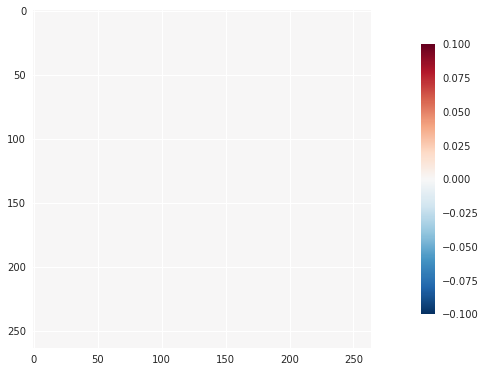

In [72]:
plot_matrix(matrix)

In [13]:
thr_matrix = ((matrix >= 4.5) | (matrix <= -4.5)) * matrix

thr_matrix.shape

(264, 264)

In [14]:
from nilearn import datasets # for fetching atlas
from nilearn import plotting

# Loading Power ROIs coordinates

power = datasets.fetch_coords_power_2011()
power_coords = np.vstack((power.rois['x'], power.rois['y'], power.rois['z'])).T



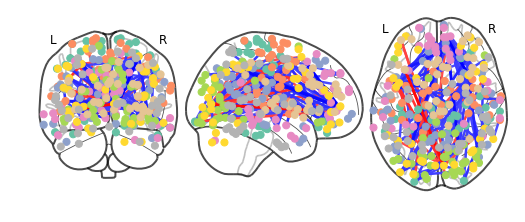

In [15]:
plotting.plot_connectome(thr_matrix, power_coords)#edge_vmin = -6, edge_vmax = 6)

In [16]:
import numpy as np

def calculate_lsn_edges (A, labels):
    """Function calculates number of edges between and within predefined large-scale networks (LSNs).
    The function takes binary symetrical adjacency matrix, module assignment of each ROI and calculate number of edges between and within each 
    large-scale network.
    
    Parameters
    ------------
    array: N x N binary ajdacency matrix
    array: N-length vector with module assignment for each node 

    Returns
    ------------
    array: M x M matrix with number of edges between each module
    
    """
    columns = np.unique(labels)
    lsn_matrix = np.zeros((len(lsn), len(columns)))
    lsn_edges = np.zeros((len(columns), len(columns)))
    
    for col in range(len(columns)):
        module = columns[col, ]
        for row in range(len(lsn)):
            if (lsn[row, ] == module):
                lsn_matrix[row, col] = 1
            else:
                lsn_matrix[row, col] = 0

    lsn_edges = lsn_matrix.T @ A @ lsn_matrix
    return lsn_edges

In [17]:
modules = pd.read_csv('/home/finc/Dropbox/Projects/LearningBrain/code/modules.txt', sep = " ", header = None)
lsn = modules[0].values
labels = np.unique(lsn)

labels

array(['AU', 'CER', 'CO', 'DA', 'DM', 'FP', 'MEM', 'SAL', 'SOM', 'SUB',
       'UNC', 'VA', 'VIS'], dtype=object)

In [18]:
networks = calculate_lsn_edges(matrix_bin, labels)

networks.shape

(13, 13)

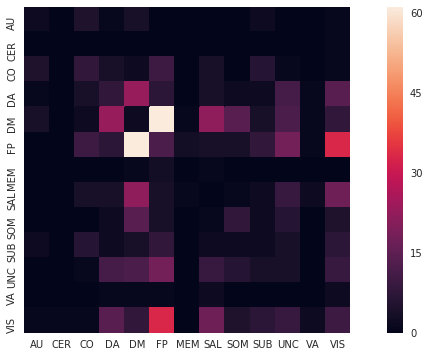

In [23]:
import seaborn as sns; sns.set()

plt.figure(figsize=(13,6))
sns.heatmap(networks, yticklabels = labels, xticklabels = labels, square = True)

In [45]:
# separate network for positive and negative differences

bin_vector_pos =  np.array([1 if thr > 0 else 0 for thr in wei_vector])
bin_vector_neg =  np.array([1 if thr < 0 else 0 for thr in wei_vector])




In [46]:
diag = np.zeros((264))
bin_matrix_pos = vec_to_sym_matrix(bin_vector_pos, diagonal = diag)
bin_matrix_neg = vec_to_sym_matrix(bin_vector_neg, diagonal = diag)

In [47]:
networks_pos = calculate_lsn_edges(bin_matrix_pos, labels)
networks_neg = calculate_lsn_edges(bin_matrix_neg, labels)



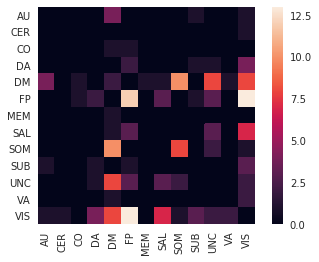

In [48]:
sns.heatmap(networks_pos, yticklabels = labels, xticklabels = labels, square = True)

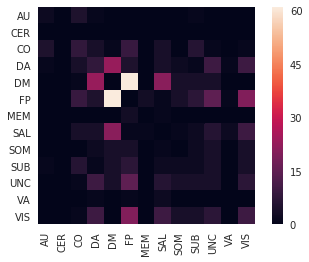

In [49]:
sns.heatmap(networks_neg, yticklabels = labels, xticklabels = labels, square = True)